### Build a linear regression model for diabete progression Problem
---

Can we use the linear regression model to predict the progress diabete progression based on BMI ?

Our aim in his exercis is apply the linear regression algorithm to a real-life problem.
In particular, we seek to:
* Build linear rgression models with Cross-Validation
* Using Hyperparameter Tuning Using Grid Search Cross-Validation

### Step to do:

In [25]:
# import the requierd pakages:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [3]:
# Load the data with Pandas using read_csv()
# Loading the dataset using pandas
df = pd.read_csv('/Users/krishnakumarbisoi/Desktop/Python/Sem 3 - Applied Machine Learning/diabetes.csv')

In [5]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1- divide the data into features (X) and target (y) --> your target is bmi

In [9]:
# write your code here:
X = df.drop('bmi', axis=1)
print(f"\nFeatures shape: {X.shape}")


Features shape: (768, 8)


In [11]:
# write your code here:
y = df['bmi']
print(f"Target shape: {y.shape}")

Target shape: (768,)


2- Plot scatter plot to get a better idea of the effect of each feature on the target variable BMI


Generating scatter plots for each feature against BMI...


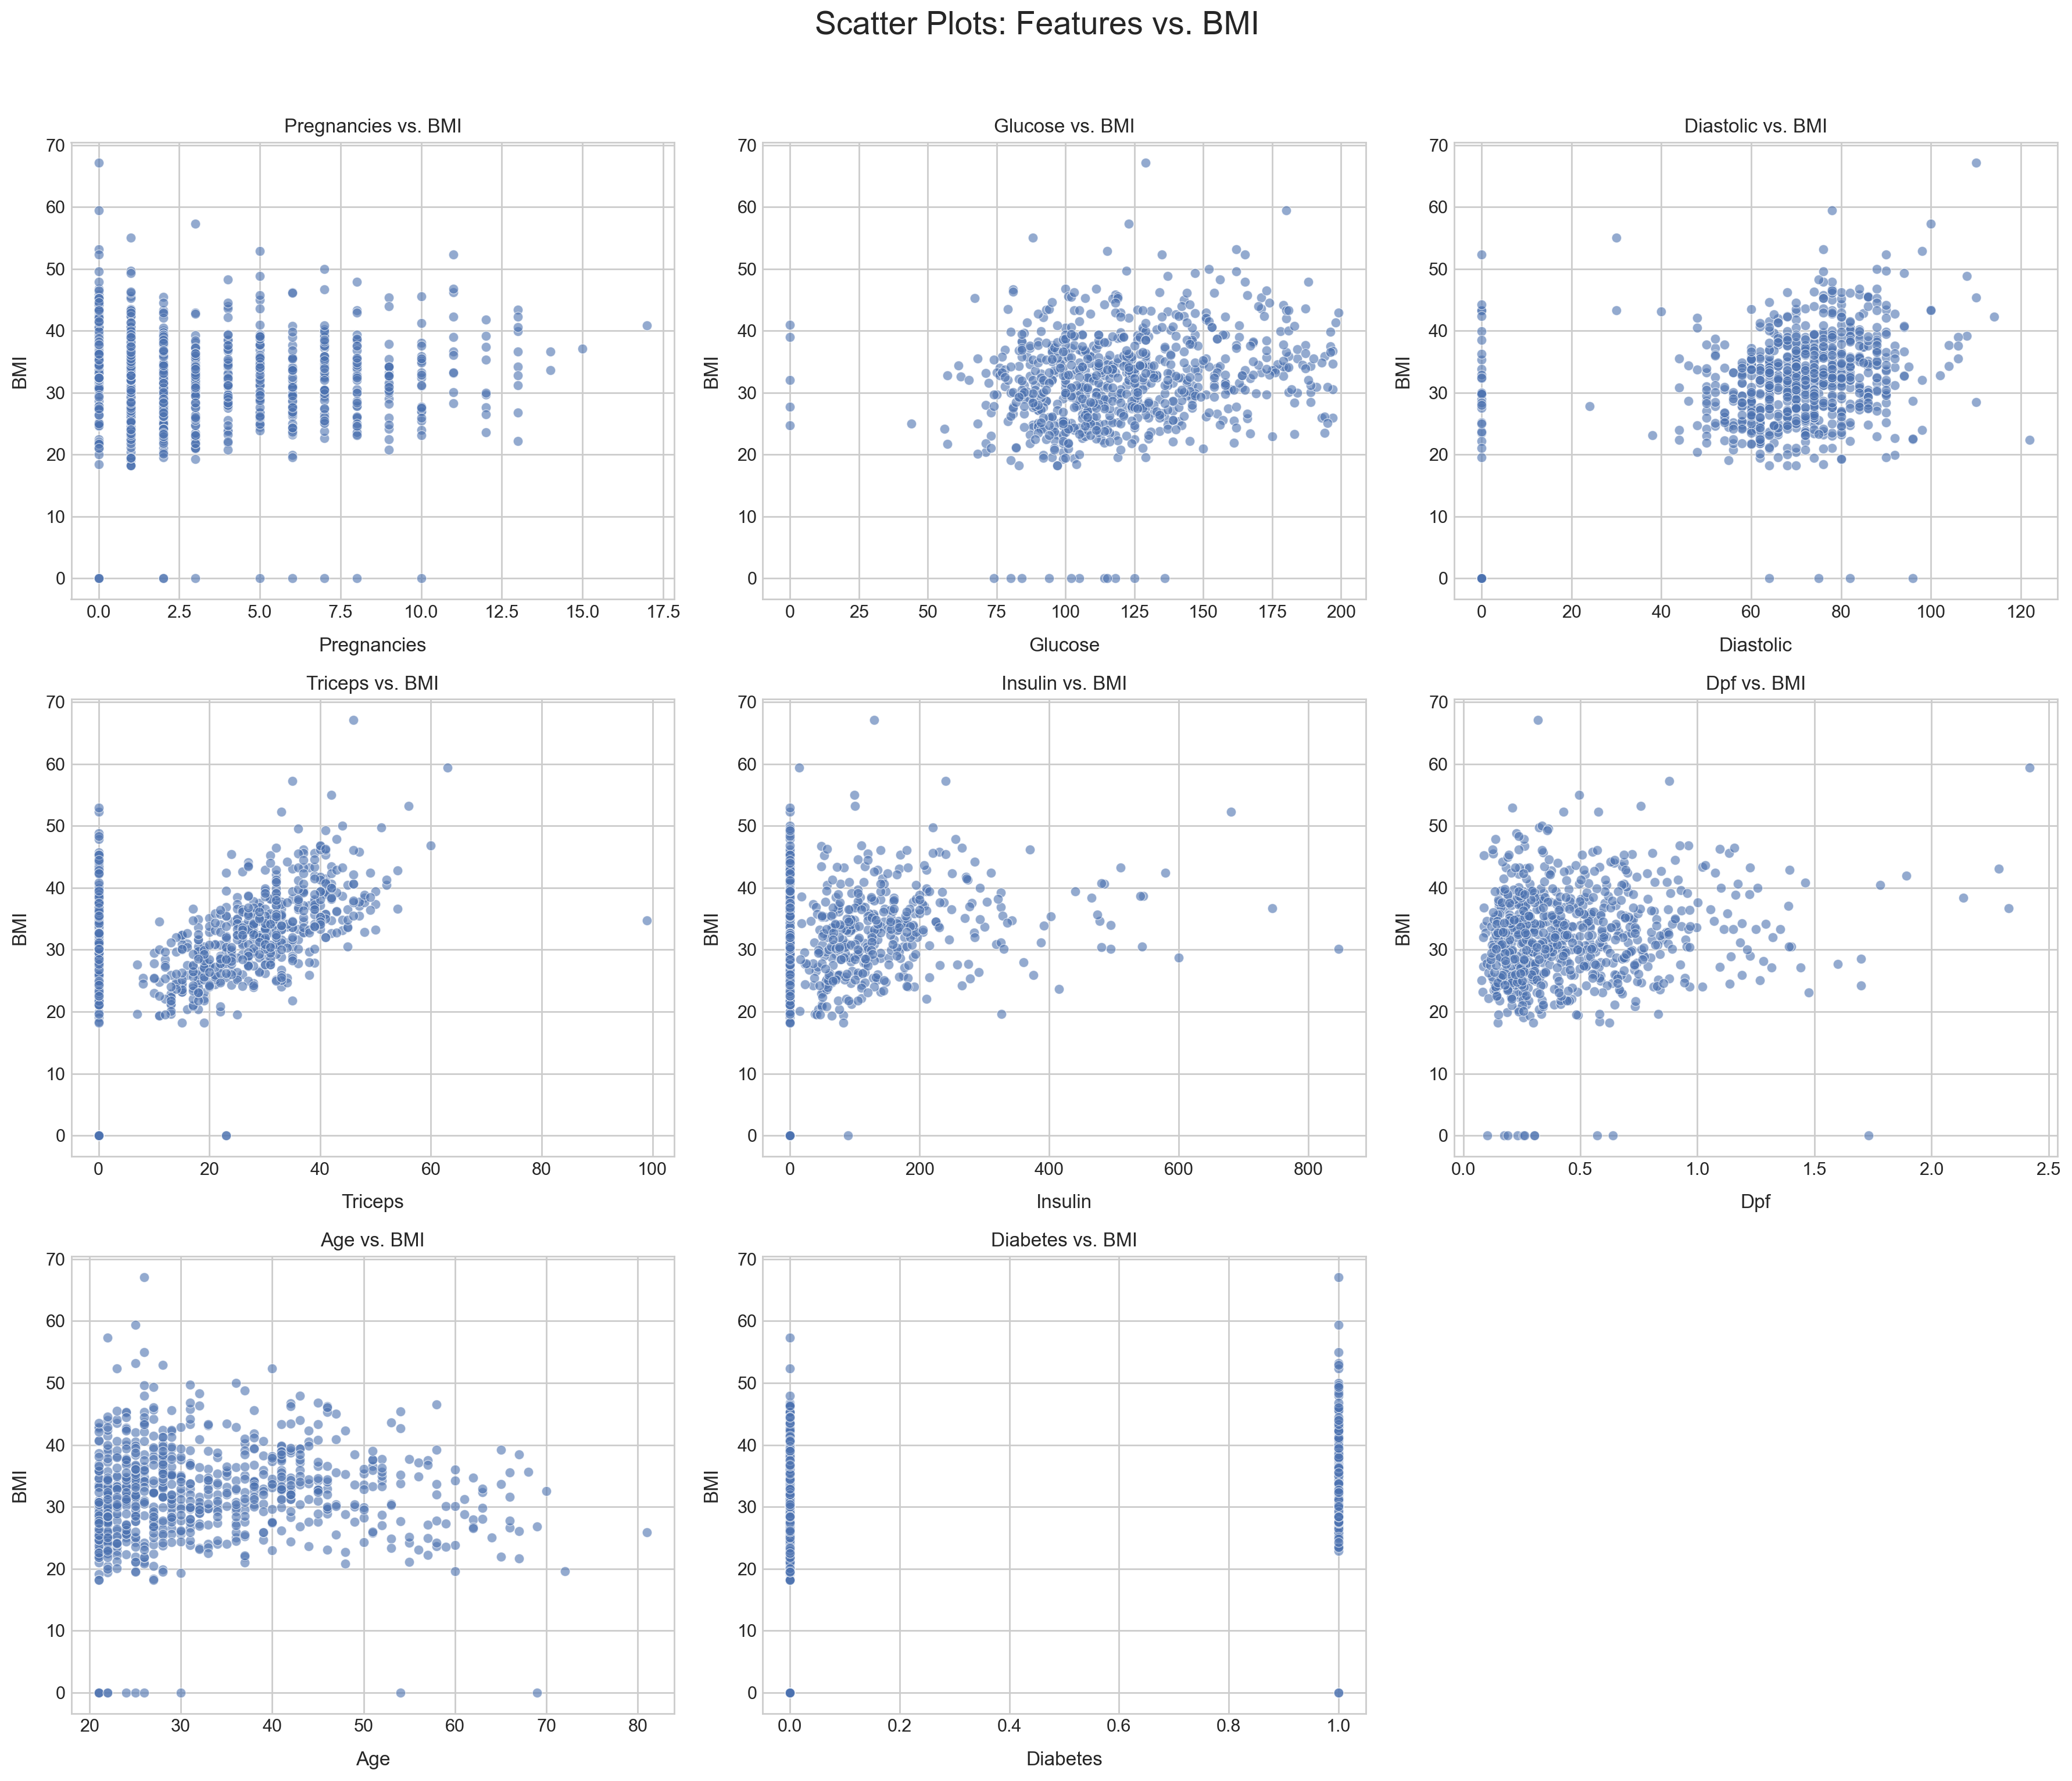

Scatter plots generated.


In [13]:
# write your code here:
print("\nGenerating scatter plots for each feature against BMI...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Scatter Plots: Features vs. BMI', fontsize=20, y=1.02)
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    sns.scatterplot(x=df[feature], y=df['bmi'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{feature.capitalize()} vs. BMI')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('BMI')
    axes[i].grid(True)

# Remove any empty subplots
if len(X.columns) < len(axes):
    for j in range(len(X.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print("Scatter plots generated.")

3- Plotting the box plot to check for outliers using boxplot


Generating box plots to check for outliers...


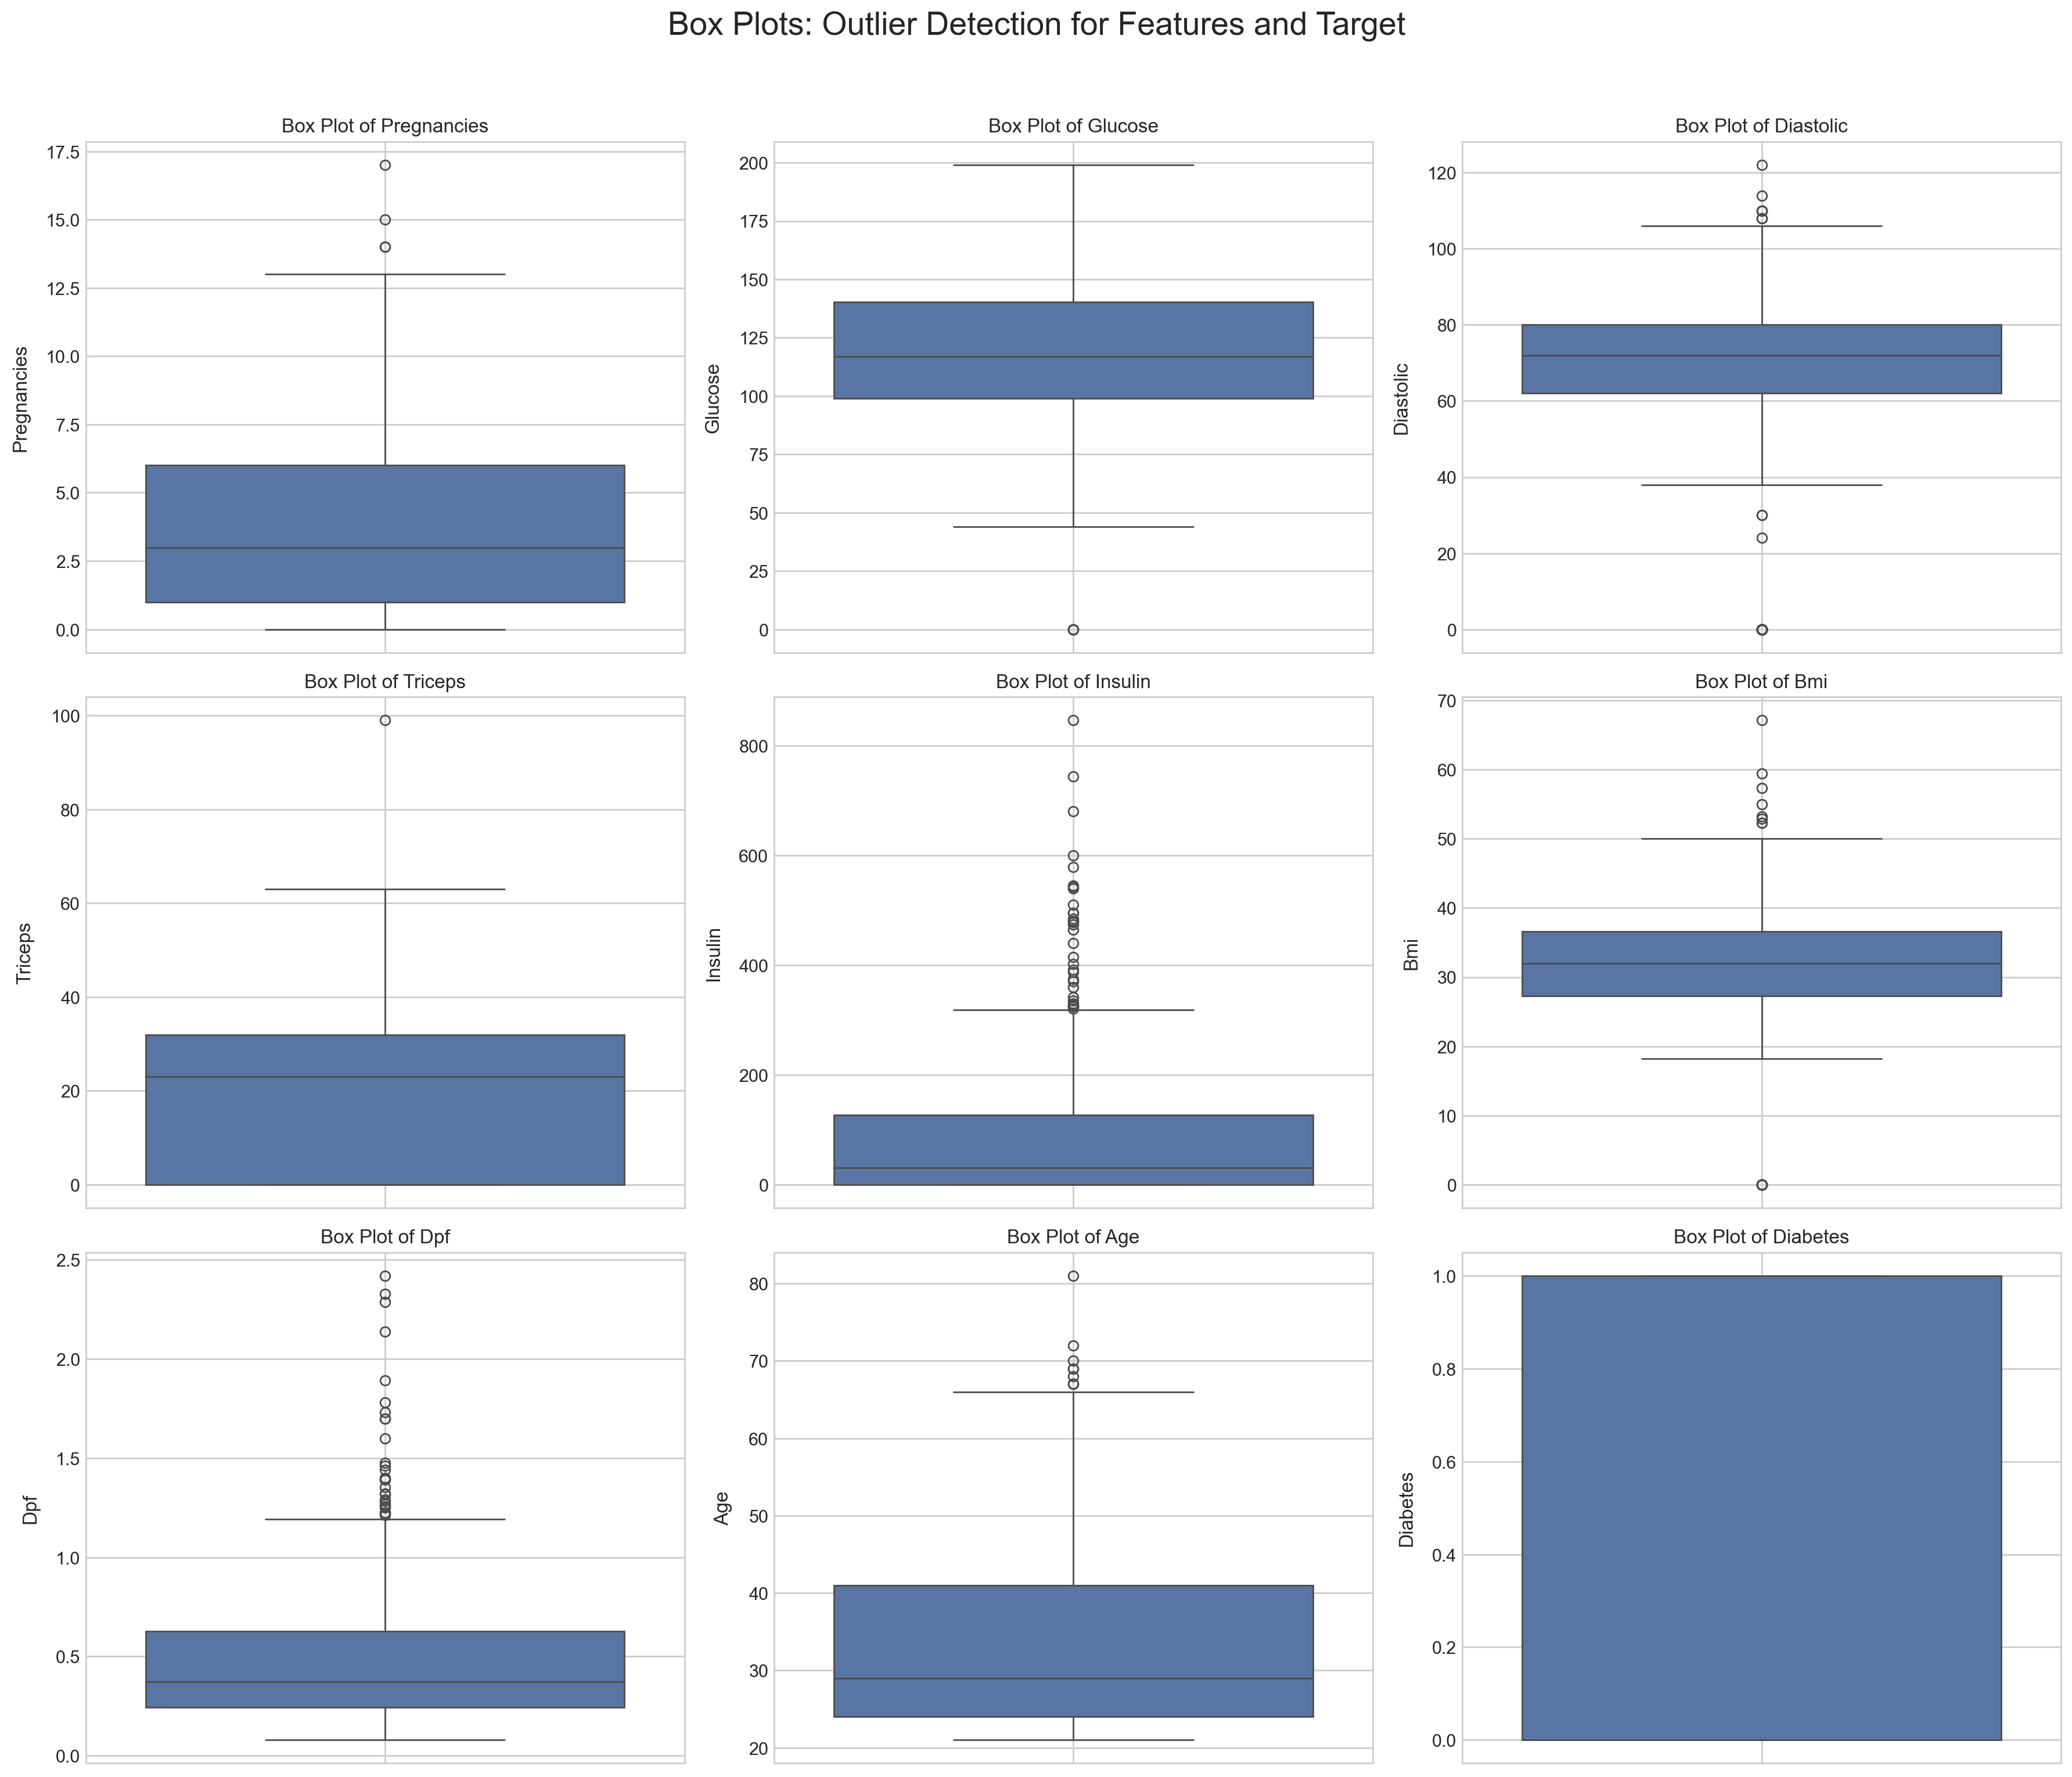

Box plots generated.


In [17]:
# write your code here:
print("\nGenerating box plots to check for outliers...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Box Plots: Outlier Detection for Features and Target', fontsize=20, y=1.02)
axes = axes.flatten()

# Plot box plots for all features
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column.capitalize()}')
    axes[i].set_ylabel(column.capitalize())
    axes[i].grid(True)

plt.tight_layout()
plt.show()
print("Box plots generated.")

4- Splitting the data into training and testing sets

We train the model with 80% of the samples and test with the remaining 20%.

In [19]:
# write your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 614 samples
Testing set size: 154 samples


5- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset, and evaluate the linear regression modle
* Use k=5
* use MSE as your metric

Remember  : 'neg_mean_squared_error' returns the negated value of the MSE, make sure to take the absolute to get the positive one

In [27]:
# write your code here:
print("\nEvaluating Linear Regression model using a Pipeline and 5-fold cross-validation...")

# Create a pipeline with a StandardScaler and a LinearRegression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Scale the features
    ('regressor', LinearRegression())   # Step 2: Fit the linear regression model
])

# Perform 5-fold cross-validation
# 'neg_mean_squared_error' is used as the scoring metric.
# It returns the negated value of the MSE.
cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Take the absolute value to get the positive MSE
mse_scores = np.abs(cv_scores)

print(f"\nMean Squared Error (MSE) for each fold: {mse_scores}")
print(f"Average MSE across all folds: {mse_scores.mean():.4f}")
print(f"Standard deviation of MSE: {mse_scores.std():.4f}")
print("\nEvaluation complete.")



Evaluating Linear Regression model using a Pipeline and 5-fold cross-validation...

Mean Squared Error (MSE) for each fold: [51.65265813 65.54242942 33.2725188  36.92932068 39.71015154]
Average MSE across all folds: 45.4214
Standard deviation of MSE: 11.7984

Evaluation complete.
